# AI & ML Video Assignment

# PCA

Please find attached the file for the practice problem on PCA for the
students for AI&ML Batch - 1. The problem statement is given below:
1 The dataset given for this problem consists of data extracted from
satellite images. The number of features is 36. 2. Reduce the dimensionality of the dataset using PCA. The threshold
limits for the eigenvalues should be varied from 0.9 to 0.97 in steps of
0.01.3. Obtain the Scree plot for each of these cases. Find the number of principal components retained due to the thresholding.

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading the given dataset

df= pd.read_csv("PCA_practice_dataset.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.03125,0.236364,0.238095,-0.090909,0.000000,0.381818,0.326316,-0.015625,-0.12500,0.553398,...,0.576923,0.471264,-0.033333,-0.046154,0.524752,0.410526,-0.015625,-0.18750,0.495146,0.515789
1,-0.03125,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.03125,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.12500,0.533981,0.368421
2,-0.03125,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.03125,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.03125,0.650485,0.452632
3,-0.03125,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.09375,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.25000,0.203883,0.094737
4,-0.03125,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.25000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.28125,0.495146,0.410526


In [3]:
x = np.matrix(df)
print (x.shape)

(8042, 35)


In [4]:
# finding mean and covariance of the given dataset 

mean = np.mean(x,axis=0)
print(mean.shape)
x_cov= np.cov(x)
print(x_cov.shape)
print (x_cov)

(1, 35)
(8042, 8042)
[[0.07045943 0.05374168 0.06304342 ... 0.00733069 0.01621207 0.01657079]
 [0.05374168 0.05183588 0.05196809 ... 0.00965658 0.01810842 0.0151184 ]
 [0.06304342 0.05196809 0.08152229 ... 0.02270087 0.02228601 0.02251113]
 ...
 [0.00733069 0.00965658 0.02270087 ... 0.03852267 0.03087382 0.03460103]
 [0.01621207 0.01810842 0.02228601 ... 0.03087382 0.03842717 0.04062317]
 [0.01657079 0.0151184  0.02251113 ... 0.03460103 0.04062317 0.04776188]]


In [5]:
# finding eigen values and eigen vectors 

eig_val, eig_vec = np.linalg.eig(x_cov)
print(eig_val)
print(eig_vec)

[ 7.06248941e+02+0.j  1.08699068e+02+0.j  3.29068375e+01+0.j ...
 -2.21063318e-18+0.j -1.07922354e-18+0.j  8.91784573e-19+0.j]
[[-5.51699297e-04+0.j  2.46822394e-02+0.j -4.01313716e-05+0.j ...
  -5.12672849e-04+0.j -2.87791967e-04+0.j  9.59880233e-04+0.j]
 [-1.12005537e-03+0.j  2.03097709e-02+0.j  5.16728885e-03+0.j ...
  -7.40179409e-06+0.j -1.13596228e-05+0.j  2.10058424e-05+0.j]
 [-2.16762510e-03+0.j  2.31265216e-02+0.j -2.58232555e-03+0.j ...
  -7.42906517e-06+0.j -7.00831424e-06+0.j  2.75391011e-07+0.j]
 ...
 [-6.59963699e-03+0.j  2.00394418e-03+0.j -7.07805423e-03+0.j ...
  -1.73251498e-03+0.j -7.00604653e-03+0.j -6.42182838e-03+0.j]
 [-6.64867385e-03+0.j  4.76974923e-03+0.j  6.10035785e-03+0.j ...
   1.27712796e-03+0.j  2.74019273e-03+0.j -1.94734271e-03+0.j]
 [-7.64735918e-03+0.j  4.39960806e-03+0.j  3.02100870e-03+0.j ...
   6.62643475e-03+0.j  1.08502184e-02+0.j -2.74676087e-03+0.j]]


In [6]:
# sorting eigen values into descending order

sort_idx = np.argsort(eig_val)
sort_idx = sort_idx[::-1]

In [7]:
# finding the principal component

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []
principal_eig_val = []
i=0
while(temp_sum<0.95*eig_val_sum): 
    principal_eig_vec.append(eig_vec[sort_idx[i]])
    principal_eig_val.append(eig_val[sort_idx[i]])
    temp_sum += eig_val[sort_idx[i]]
    i += 1
print("principal_eig_vec")
print(principal_eig_vec)
print("principal_eig_val")
print(principal_eig_val)
print("Number of components",i)

principal_eig_vec
[array([-5.51699297e-04+0.j,  2.46822394e-02+0.j, -4.01313716e-05+0.j, ...,
       -5.12672849e-04+0.j, -2.87791967e-04+0.j,  9.59880233e-04+0.j]), array([-1.12005537e-03+0.j,  2.03097709e-02+0.j,  5.16728885e-03+0.j, ...,
       -7.40179409e-06+0.j, -1.13596228e-05+0.j,  2.10058424e-05+0.j]), array([-2.16762510e-03+0.j,  2.31265216e-02+0.j, -2.58232555e-03+0.j, ...,
       -7.42906517e-06+0.j, -7.00831424e-06+0.j,  2.75391011e-07+0.j]), array([-1.75044841e-03+0.j,  2.17961441e-02+0.j, -2.39398274e-03+0.j, ...,
        4.59703792e-05+0.j,  1.56210066e-05+0.j,  1.14113019e-04+0.j]), array([-2.36353306e-04+0.j,  2.59465369e-02+0.j,  9.14307260e-04+0.j, ...,
       -7.88827685e-06+0.j, -7.83504701e-05+0.j,  2.26694983e-04+0.j]), array([-7.87049247e-04+0.j,  2.42280065e-02+0.j,  1.55443477e-04+0.j, ...,
       -6.79861562e-05+0.j, -3.33748185e-05+0.j,  5.22452077e-05+0.j]), array([-3.93591092e-04+0.j,  2.59934692e-02+0.j,  1.03392131e-02+0.j, ...,
        6.99740924e-06+0

In [8]:
# transfornation matrix
Q_hat = np.matrix(principal_eig_vec)
Q_hat = Q_hat.T
print(Q_hat)

print("Q_hat.shape") 
print(Q_hat.shape)

[[-5.51699297e-04+0.j -1.12005537e-03+0.j -2.16762510e-03+0.j ...
  -2.36353306e-04+0.j -7.87049247e-04+0.j -3.93591092e-04+0.j]
 [ 2.46822394e-02+0.j  2.03097709e-02+0.j  2.31265216e-02+0.j ...
   2.59465369e-02+0.j  2.42280065e-02+0.j  2.59934692e-02+0.j]
 [-4.01313716e-05+0.j  5.16728885e-03+0.j -2.58232555e-03+0.j ...
   9.14307260e-04+0.j  1.55443477e-04+0.j  1.03392131e-02+0.j]
 ...
 [-5.12672849e-04+0.j -7.40179409e-06+0.j -7.42906517e-06+0.j ...
  -7.88827685e-06+0.j -6.79861562e-05+0.j  6.99740924e-06+0.j]
 [-2.87791967e-04+0.j -1.13596228e-05+0.j -7.00831424e-06+0.j ...
  -7.83504701e-05+0.j -3.33748185e-05+0.j  2.52329941e-05+0.j]
 [ 9.59880233e-04+0.j  2.10058424e-05+0.j  2.75391011e-07+0.j ...
   2.26694983e-04+0.j  5.22452077e-05+0.j  3.69169453e-05+0.j]]
Q_hat.shape
(8042, 7)


C:\Users\Anup\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


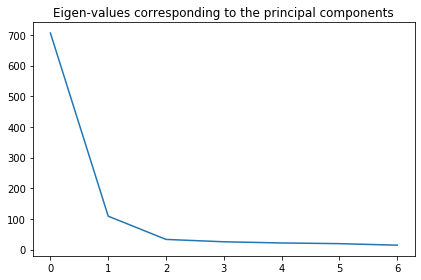

In [10]:
# plotting Scree plot

fig, ax = plt.subplots()

ax.plot(principal_eig_val)
ax.set_title("Eigen-values corresponding to the principal components")

plt.tight_layout()